# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q=Minneapolis"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ddc12c6182c5dc82d807ff8befdbb78c&q=Minneapolis


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
name = []

city_number = 1
for city in cities:
    
    # Build partial query URL 
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
   
    # Try to grab the weather data if they are available in API
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {city_number} of {total_cities} | {city}")
        city_number+=1
    # Handle exceptions for data that is not available
    except:
        # Append null values
        print(f"Data for {city} not found.  Skipping...")
        pass
        city_number+=1
    time.sleep(1)
    


Processing Record 1 of 640 | jamestown
Processing Record 2 of 640 | bagotville
Processing Record 3 of 640 | provideniya
Processing Record 4 of 640 | san cosme y damian
Processing Record 5 of 640 | oda
Processing Record 6 of 640 | pytalovo
Processing Record 7 of 640 | nikolskoye
Data for taolanaro not found.  Skipping...
Data for dien bien not found.  Skipping...
Processing Record 10 of 640 | oktyabrskoye
Processing Record 11 of 640 | slave lake
Processing Record 12 of 640 | pitimbu
Processing Record 13 of 640 | punta arenas
Processing Record 14 of 640 | bluff
Processing Record 15 of 640 | banda aceh
Data for grand centre not found.  Skipping...
Processing Record 17 of 640 | port alfred
Processing Record 18 of 640 | bethel
Processing Record 19 of 640 | hermanus
Processing Record 20 of 640 | castro
Processing Record 21 of 640 | kaitangata
Processing Record 22 of 640 | thompson
Processing Record 23 of 640 | portland
Processing Record 24 of 640 | saint-philippe
Data for karamay not found. 

Processing Record 205 of 640 | havelock
Processing Record 206 of 640 | champerico
Processing Record 207 of 640 | qaanaaq
Processing Record 208 of 640 | sydney
Data for grand river south east not found.  Skipping...
Processing Record 210 of 640 | norman wells
Processing Record 211 of 640 | patrocinio
Processing Record 212 of 640 | barabai
Processing Record 213 of 640 | hurghada
Processing Record 214 of 640 | torrelavega
Processing Record 215 of 640 | pisco
Processing Record 216 of 640 | kingsville
Processing Record 217 of 640 | flinders
Data for kuche not found.  Skipping...
Processing Record 219 of 640 | upernavik
Processing Record 220 of 640 | posse
Data for toliary not found.  Skipping...
Processing Record 222 of 640 | diego de almagro
Processing Record 223 of 640 | balabac
Processing Record 224 of 640 | camargo
Processing Record 225 of 640 | namwala
Processing Record 226 of 640 | longyearbyen
Processing Record 227 of 640 | bull savanna
Processing Record 228 of 640 | livny
Processing

Processing Record 409 of 640 | pontianak
Processing Record 410 of 640 | inhambane
Processing Record 411 of 640 | bykovo
Processing Record 412 of 640 | fort nelson
Processing Record 413 of 640 | cabanas
Data for palabuhanratu not found.  Skipping...
Processing Record 415 of 640 | urumqi
Data for dubenskiy not found.  Skipping...
Processing Record 417 of 640 | lodja
Processing Record 418 of 640 | san quintin
Processing Record 419 of 640 | noumea
Processing Record 420 of 640 | russelsheim
Processing Record 421 of 640 | broken hill
Processing Record 422 of 640 | sturgeon falls
Processing Record 423 of 640 | dharmabad
Processing Record 424 of 640 | ketchikan
Processing Record 425 of 640 | korla
Processing Record 426 of 640 | imeni babushkina
Processing Record 427 of 640 | challans
Processing Record 428 of 640 | gayny
Processing Record 429 of 640 | sambava
Processing Record 430 of 640 | sibolga
Processing Record 431 of 640 | ilulissat
Processing Record 432 of 640 | mount isa
Data for bolunga

Processing Record 611 of 640 | jardim
Processing Record 612 of 640 | sayyan
Processing Record 613 of 640 | kirakira
Processing Record 614 of 640 | tiznit
Processing Record 615 of 640 | batangafo
Processing Record 616 of 640 | hofn
Processing Record 617 of 640 | porto novo
Processing Record 618 of 640 | la plata
Data for umzimvubu not found.  Skipping...
Processing Record 620 of 640 | mnogovershinnyy
Processing Record 621 of 640 | dwarka
Processing Record 622 of 640 | general roca
Processing Record 623 of 640 | aberdeen
Processing Record 624 of 640 | trani
Processing Record 625 of 640 | bone
Processing Record 626 of 640 | farafangana
Processing Record 627 of 640 | aguada de pasajeros
Processing Record 628 of 640 | shebalino
Processing Record 629 of 640 | ada
Processing Record 630 of 640 | veisiejai
Processing Record 631 of 640 | pangody
Processing Record 632 of 640 | peniche
Processing Record 633 of 640 | cairns
Processing Record 634 of 640 | mawlaik
Processing Record 635 of 640 | sunga

#Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,21.00,68,90,6.91,US,1612829793
1,Bagotville,-28.9833,153.4167,78.80,50,53,17.27,AU,1612830030
2,Provideniya,64.3833,-173.3000,6.80,78,75,20.13,RU,1612829817
3,San Cosme y Damián,-27.3167,-56.3500,86.00,45,20,6.91,PY,1612830033
4,Ōdachō-ōda,35.1833,132.5000,35.60,87,75,5.75,JP,1612830034
...,...,...,...,...,...,...,...,...,...
583,Koslan,63.4564,48.8989,-23.62,84,98,8.46,RU,1612830795
584,Marawi,7.9986,124.2928,80.01,81,100,5.01,PH,1612830796
585,Tautira,-17.7333,-149.1500,84.20,65,75,8.05,PF,1612830797
586,Värnamo,57.1860,14.0400,19.99,90,99,5.01,SE,1612830798


In [10]:
# Output File (CSV)
weather_data.to_csv(output_data_file)

In [11]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,20.313634,21.917612,49.184422,73.363946,53.209184,8.113690,1.612830e+09
std,32.904236,88.365143,31.148080,19.269633,40.012802,5.600064,2.941068e+02
min,-54.800000,-179.166700,-40.000000,9.000000,0.000000,0.200000,1.612830e+09
25%,-7.564125,-55.091525,25.865000,64.000000,9.750000,3.975000,1.612830e+09
50%,22.839750,27.516350,60.800000,79.000000,61.500000,6.910000,1.612830e+09
75%,48.575050,99.472150,75.302500,88.000000,94.000000,10.710000,1.612831e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,37.980000,1.612831e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_df = weather_data.sort_values(['Humidity'], ascending=False)
humidity_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
58,Vila Velha,-20.3297,-40.2925,78.01,100,75,9.22,BR,1612829855
407,Pangai,-19.8000,-174.3500,78.80,100,90,14.97,TO,1612830568
351,Mashhad,36.2970,59.6062,39.20,100,32,2.55,IR,1612830496
332,Sibu,2.3000,111.8167,77.00,100,20,1.07,MY,1612830471
360,Bač,45.3919,19.2367,39.00,100,75,3.44,RS,1612830506
245,Torbay,47.6666,-52.7314,32.00,100,90,29.93,CA,1612829590
32,Carnarvon,-24.8667,113.6333,78.80,100,40,19.57,AU,1612829644
487,Linqiong,30.4159,103.4609,44.60,100,100,1.68,CN,1612830673
90,Airai,-8.9266,125.4092,65.17,100,100,3.80,TL,1612829837
342,Bonavista,48.6499,-53.1147,32.00,100,100,11.50,CA,1612830022


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop([0,1], inplace=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

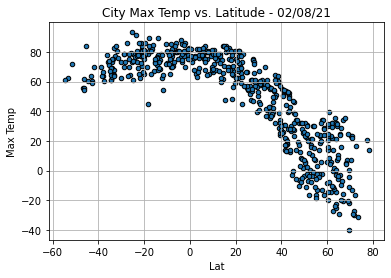

In [18]:
lat_temp = weather_data.plot(kind="scatter", x ="Lat", y="Max Temp", edgecolor="black", grid = True,
                            title="City Max Temp vs. Latitude - 02/08/21") 
plt.savefig("Temp_vs_Lat.png")


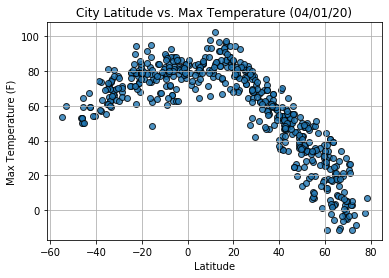

## Latitude vs. Humidity Plot

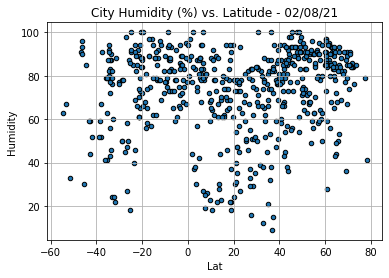

In [19]:
lat_humidity = weather_data.plot(kind="scatter", x ="Lat", y="Humidity", edgecolor="black", grid = True, 
                             title="City Humidity (%) vs. Latitude - 02/08/21")
plt.savefig("Humidity_vs_Latitude.png")

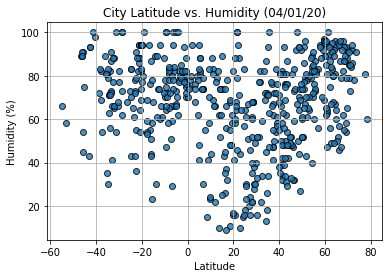

## Latitude vs. Cloudiness Plot

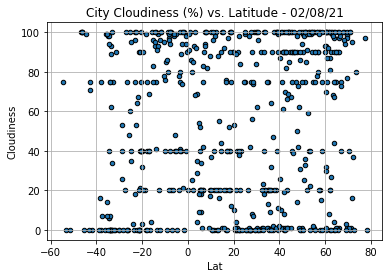

In [20]:
lat_cloud = weather_data.plot(kind="scatter", x ="Lat", y="Cloudiness", edgecolor="black", grid = True, 
                             title="City Cloudiness (%) vs. Latitude - 02/08/21")
plt.savefig("Cloudiness_vs_Latitude.png")

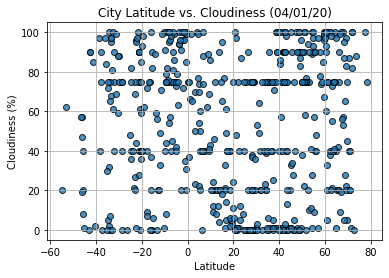

## Latitude vs. Wind Speed Plot

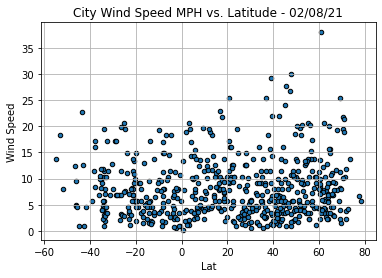

In [21]:
lat_wind = weather_data.plot(kind="scatter", x ="Lat", y="Wind Speed", edgecolor="black", grid = True, 
                             title="City Wind Speed MPH vs. Latitude - 02/08/21")
plt.savefig("Wind_vs_Lat.png")

## Linear Regression

In [22]:
north_weather_data = weather_data[weather_data['Lat'] >= 0]
north_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,21.00,68,90,6.91,US,1612829793
2,Provideniya,64.3833,-173.3000,6.80,78,75,20.13,RU,1612829817
4,Ōdachō-ōda,35.1833,132.5000,35.60,87,75,5.75,JP,1612830034
5,Pytalovo,57.0679,27.9138,5.63,95,100,7.20,RU,1612830035
6,Nikolskoye,59.7035,30.7861,6.01,85,90,4.47,RU,1612829997
...,...,...,...,...,...,...,...,...,...
581,Mawlaik,23.6333,94.4167,57.18,63,0,1.01,MM,1612830792
583,Koslan,63.4564,48.8989,-23.62,84,98,8.46,RU,1612830795
584,Marawi,7.9986,124.2928,80.01,81,100,5.01,PH,1612830796
586,Värnamo,57.1860,14.0400,19.99,90,99,5.01,SE,1612830798


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation Coefficient is: -0.874935134263991


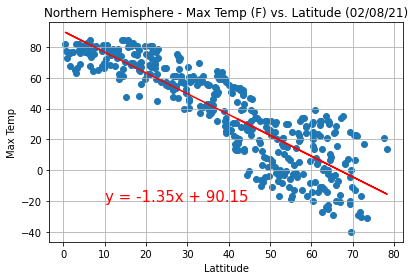

In [23]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Temp_vs_Lat.png")
plt.show()


The r-value is: 0.46937863826630627


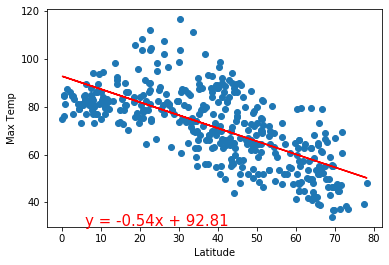

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
south_weather_data = weather_data[weather_data['Lat'] < 0]
south_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bagotville,-28.9833,153.4167,78.80,50,53,17.27,AU,1612830030
3,San Cosme y Damián,-27.3167,-56.3500,86.00,45,20,6.91,PY,1612830033
9,Pitimbu,-7.4706,-34.8086,80.60,83,20,8.05,BR,1612830042
10,Punta Arenas,-53.1500,-70.9167,62.60,67,0,18.41,CL,1612830043
11,Bluff,-46.6000,168.3333,55.76,91,100,12.48,NZ,1612829777
...,...,...,...,...,...,...,...,...,...
569,General Roca,-39.0333,-67.5833,69.80,52,0,5.75,AR,1612830778
573,Farafangana,-22.8167,47.8333,78.12,89,100,7.09,MG,1612830783
580,Cairns,-16.9167,145.7667,80.60,89,40,3.74,AU,1612830702
582,Sungai Penuh,-2.0833,101.3833,69.91,78,100,2.21,ID,1612830793


The Correlation Coefficient is: 0.4885703181054928


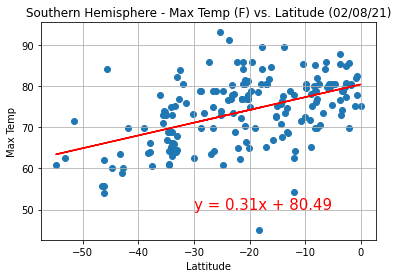

In [25]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude (02/08/21)")
#plt.tight_layout()
plt.savefig("South_Temp_vs_Lat.png")
plt.grid()
plt.show()


The r-value is: 0.6082708688906918


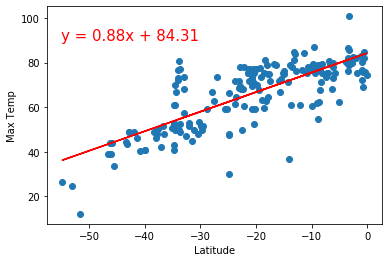

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.2807918508065515


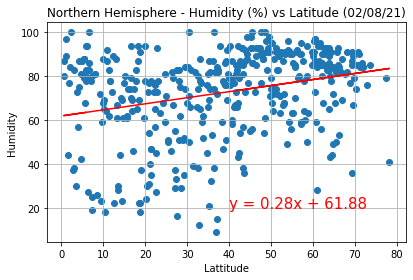

In [26]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Humidity_vs_Lat.png")
plt.show()

The r-value is: 0.000543987878808455


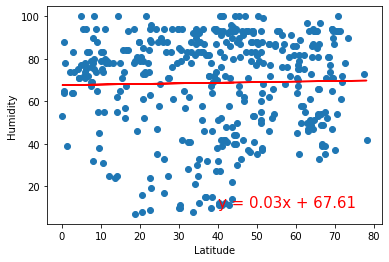

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.2998620845934075


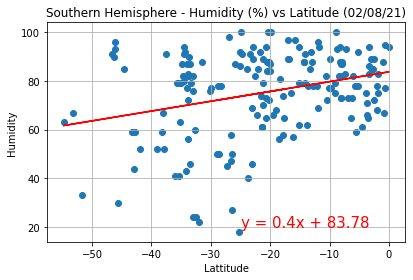

In [27]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Humidity (%) vs Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Humidity_vs_Lat.png")
plt.show()

The r-value is: 0.014985174297345524


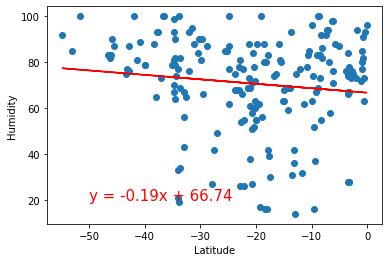

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.1562672826213059


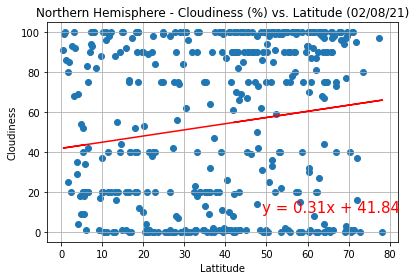

In [28]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(49,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Cloudiness_vs_Lat.png")
plt.show()

The r-value is: 0.0020898727664228514


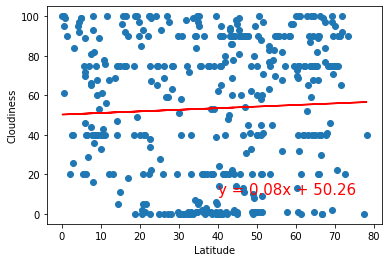

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.2399762005292577


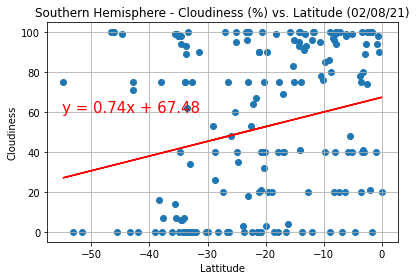

In [29]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Cloudiness_vs_Lat.png")
plt.show()

The r-value is: 0.0035263772085582894


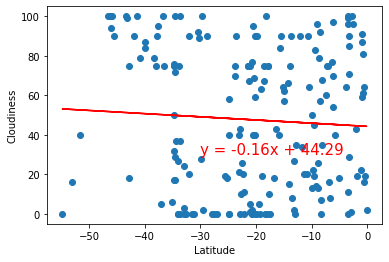

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation Coefficient is: 0.041316375910151394


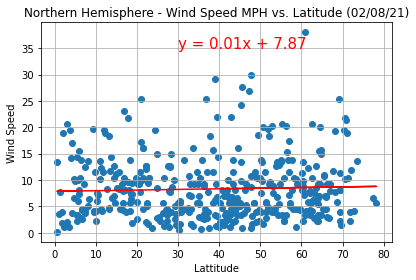

In [30]:
x_values = north_weather_data["Lat"]
y_values = north_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(30,35),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Northern Hemisphere - Wind Speed MPH vs. Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("North_Wind_vs_Lat.png")
plt.show()

The r-value is: 0.04019723576144484


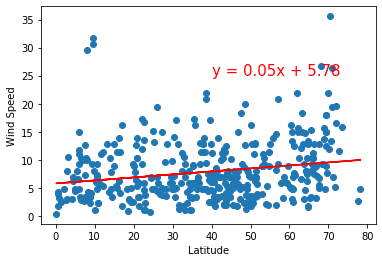

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation Coefficient is: -0.17580438069552384


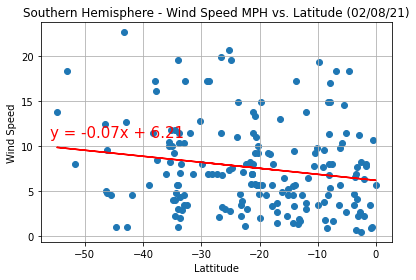

In [31]:
x_values = south_weather_data["Lat"]
y_values = south_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-56,11),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Southern Hemisphere - Wind Speed MPH vs. Latitude (02/08/21)")
plt.tight_layout()
plt.grid()
plt.savefig("South_Wind_vs_Lat.png")
plt.show()

The r-value is: 0.017128274759839232


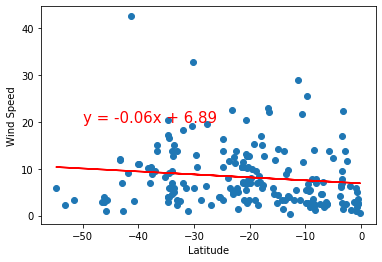